## Capítulo 2: Machine Learning Supervisado y No Supervisado

En el universo de los algoritmos de Machine Learning, existen dos grandes tipos: Supervisado y no supervisado. Aprendizaje supervisado consiste en modelos donde se tienen todos los datos de entrenamiento. El Aprendizaje supervisado es donde el modelo deriva y reconoce patrones de información de unos datos, mientras determina el parametro de afinidad. 

### Modelos supervisados:

Los modelos supervisados se dividen en estos tipos:

* Regresión: Estos modelos son muy comunes. Son usados principalmente para observar como los datos evolucionan respecto a otra variable, y examinar cuales se pueden predecir en el futuro.

* Clasificación: Estos modelos son usados para organizar los datos en esquemas que hacen un sentido categórico.

* Mixtos: Estos modelos normalmente se conforman en partes de regresión, para informar como hacer la clasificación, o viseversa.

### Regresión:

En su nucleo, una linea de regresión es una en la cual se ajustan los datos que tienen un elemento *x* y *y*. Se usa una equación para predecir cual es la correspondiente salida *y*, para una entrada dada *x*. Este método siempre se usa para datos numéricos. Un ejemplo de regresión sería:

In [1]:
import pandas as pd

data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


De este conjunto de datos, se pueden obtener muchas graficas, por ejemplo, la eficiencia del combustible (mpg) contra el tamaño del motor(disp):

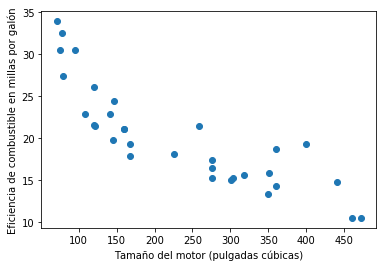

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data['disp'],data['mpg']); 
plt.ylabel("Eficiencia de combustible en millas por galón"); plt.xlabel("Tamaño del motor (pulgadas cúbicas)"); plt.show()

*Figura 2-1. Gráfica que representa la eficiencia de combustible como función de el tamaño del motor*

Se puede observar que entre más grande sea el motor, la eficiencia del combustible baja. Para calcular la eficiencia de un nuevo motor en base a este modelo, es necesario hacer un modelo de regresión lineal:

In [4]:
import statsmodels.formula.api as smf 
reg = smf.ols('mpg ~ disp',data=data).fit()
print('Pendiente:',reg.params['disp'])
print('Coeficiente:',reg.params['Intercept'])
print('Eficiencia de combustible =',reg.params['disp'],'x Tamaño del motor +',reg.params['Intercept'])

Pendiente: -0.04121511996278616
Coeficiente: 29.599854756163957
Eficiencia de combustible = -0.04121511996278616 x Tamaño del motor + 29.599854756163957


Con esta formula entonces, se tiene un modelo muy simple de Machine learning. Probando este modelo en un carro con un motor de 200 pulgadas cubicas se obtendría:

In [5]:
print(reg.params['disp']*200+reg.params['Intercept'])

21.356830763606723


Incluso con este modelo, se podría pensar en expandirlo. Se podría pensar en un modelo que no solo calcule la eficiencia del motor en base a su tamaño, sino también en el número de cilindros, caballos de fuerza, numero de cambios, etc. 

### Entrenamiento y evaluación de los datos

Del modelo de regresión lineal trabajado antes, ya se cuenta con un modelo que predice futuros valores. Pero no se conoce aún la exactitud del modelo. Una manera de determinarla es observar el valor de R cuadrado del modelo:

In [6]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           9.38e-10
Time:                        16:24:31   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.0

El método summary del modelo de regresión lineal muestra mucha información. El parametro de exactitud es el de *Adj. R-squared* que se refiere al valor de R-cuadrado ajustado. Este valor indica cuanto están linealmente correlacionados los datos, es decir, mientras que el valor sea más cercano a 1, mejor es el modelo. La razón por la que se abarca el r-cuadrado ajustado es porque para una cantidad baja de características el R-cuadrado ajustado y el multiple, son básicamente lo mismo, sin embargo, en modelos con muchas características es mucho mejor usar valores de R-cuadrado multiples, porque se tendrá una evaluación más exacta si se tienen muchas características dependientes, en vez de solo una. 

Al estar realizando la evaluación del modelo sobre los mismos datos con los que se entrena, hace que el error no sea confiable. Para asegurar que el valor del error no tenga ningún tipo parcialidad, se debe separar de todos los datos, un conjunto de entrenamiento y otro de evaluación. En este caso, se hará la división en un 80% para entrenamiento y el restante 20% para evaluación:

In [7]:
import random
split_size=0.8
sample_size=int(split_size*len(data.index))
random.seed(123)
train_indices=random.sample(list(data.index),sample_size)
#train_indices=[31,15,19,14,3,10,18,22,11,5,20,29,23,30,9,28,8,27,7,32,26,17,4,1,24]; train_indices=[i-1 for i in train_indices]
train = data[data.index.isin(train_indices)]
test = data[~data.index.isin(train_indices)]

En el anterior codigo, se ha dividido el conjunto de datos de mtcars en dos dataframes. Uno con el 80% de los datos y el otro con el 20% restante. Por efectos de reproducibilidad, se ha fijado una semilla para que el algoritmo de aleatoriedad siempre escoja la misma muestra de indices. 

Ahora, se construirá un modelo de regresión, solo usando los datos del dataframe *train*. Después, ya obtenido el modelo, se pasará por este los datos contenidos en el dataframe *test*:

In [8]:
reg2=smf.ols('mpg ~ disp',data=train).fit()
test_output=reg2.predict(test['disp'])
print(((sum(test['mpg']-test_output)**2)/len(test.index))**(1/2))

#(reg2.ssr/reg2.df_resid)**(1/2)   Forma de calcular el error estandar residual del modelo en sí.

1.704771651111348


Si se calculara el error estandar del modelo, daría 3.409. Pero este valor es dudoso porque fue calculado con los mismos datos que se utilizaron para entrenar el modelo, así pues, el valor calculado antes, es con los datos separados de evaluación, que son completamente desconocidos para el modelo, por lo cual se puede confiar más en ese valor.

### Clasificación

En contranste al modelamiento de regresión, se puede decir que el modelamiento de clasificación es frecuentemente menos encontrado en el mundo de Machine learning. En vez de predecir valores continuos, la clasificación predice valores discretos, o clases.

### Regresión logística

En algunas ocasiones, contrario a la regresión, se desea saber si cierto dato de entrada es de naturaleza categórica en vez de numérica. 

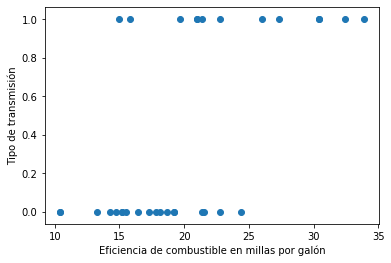

In [9]:
plt.scatter(data['mpg'],data['am']); 
plt.xlabel("Eficiencia de combustible en millas por galón"); plt.ylabel("Tipo de transmisión"); plt.show()

*Figura 2-2. Gráfica que representa el tipo de transmisión del vehículo como función de la eficiencia de combustible. Es muy diferente a la gráfica de la eficiencia del combustible contra el tamaño del motor.*

Este conjunto de datos es diferente a lo que se ha visto antes. En este caso, cada vehículo tiene una asignación de 1 o 0, para determiar si su transmisión es automática o manual, contenida en la columna llamada *am*. En este caso, usar regresión lineal no tiene sentido, en vez de eso, se usará el modelo de regresión logistica para ayudar a clasificar, dada una nueva eficiencia de combustible, a que tipo de transmisión pertenece. Aquí surge una nueva pregunta: ¿Como la eficiencia de combustible está relacionada con el tipo de transmisión?

La regresión logistica brinda salidas discretas en vez de continuas. En este caso, se esperaría obtener o unos o ceros.

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np

x = np.array(list(train['mpg'])).reshape(-1, 1); y = np.array(list(train['am']))
model = LogisticRegression(solver='liblinear')
model.fit(x, y)

x_test=np.array(list(test['mpg'])).reshape(-1, 1)
p_pred = model.predict_proba(x_test)
y_pred = model.predict(x_test)

pd.DataFrame({"test_am":test.am,"test_mpg":test.mpg,"pred am":y_pred ,"x0":p_pred[:,0],"x1":p_pred[:,1]})

,test_am,test_mpg,pred am,x0,x1
7,0,24.4,1,0.411142,0.588858
9,0,19.2,1,0.495070,0.504930
14,0,10.4,0,0.635263,0.364737
15,0,10.4,0,0.635263,0.364737
16,0,14.7,0,0.568099,0.431901
23,0,13.3,0,0.590374,0.409626
27,1,30.4,1,0.320601,0.679399


Utilizando el conjunto de datos divididos llamados *train* y *test*, se invocó la clase de regresión logistica, y después, con la información de las columnas *mpg* y *am*, se utilizó el metodo *fit* de la clase para entrenar el modelo con esta información. Eventualmente se evaluó el modelo con el conjunto de datos *test*. Para presentar los resultados, se creó un Data Frame que contiene la información de *test*, y además la clase predecida, y la información de las probabilidades que el modelo asigno, siendo *x0* la probabilidad para la clase 0 y *x1* para la clase *1*. 

### Metodos de Clustering supervisados

El clustering consiste en definir clases basandose en qué tan agrupados estén los conjunto de datos. En ocasiones estas agrupaciones no son faciles de ver, y un algoritmo de clustering puede ayudar a encontrar estos patrones escondidos a simple vista. El clustering es una muestra de un ecosistema de algoritmos que pueden ser usados en casos de entrenamiento supervisado y no supervisado. Este es una de las formas más populares de clasificación, y el algoritmo más popular es el denominado *k-means*

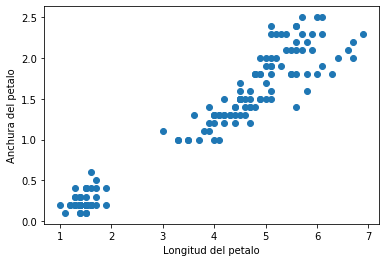

In [11]:
iris=pd.read_csv("https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
plt.scatter(iris['petal.length'],iris['petal.width']); 
plt.xlabel("Longitud del petalo"); plt.ylabel("Anchura del petalo"); plt.show()

In [29]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


*Figura 2-3. La gráfica que muestra la anchura del petalo en función a la longitud del petalo. Obtenido del conjunto de datos Iris.*

Para distinguir un numero de grupos deseado en este conjunto de datos, se utilizará el algoritmo de K-means. Este algoritmo funciona, primero, situando un numero de puntos aleatorios de evaluación en el conjunto de datos, dependiendo la cantidad de grupos deseado. Cada punto de el conjunto de datos real se le mide la distancia respecto a los puntos de evaluación, entonces estos puntos son movidos de manera que la distancia sea reducida.

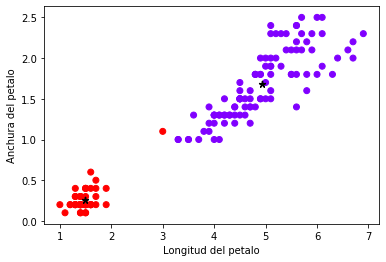

In [12]:
from sklearn.cluster import KMeans
X=np.column_stack((iris['petal.length'],iris['petal.width']))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',marker=(5,2))
plt.xlabel("Longitud del petalo"); plt.ylabel("Anchura del petalo"); plt.show()

*Figura 2-4. Los mismos datos que en la Figura 2-3, pero con el algoritmo k-means aplicado*

Se puede observar que el algoritmo separó los datos en dos grandes grupos. En la parte inferior izquierda hay un grupo o *cluster* de color rojo y el otro se encuentra en la parte superior derecha, de color morado. Los asteriscos negros denotan el centro del grupo. Pero el algoritmo también podría funcionar con mas grupos:

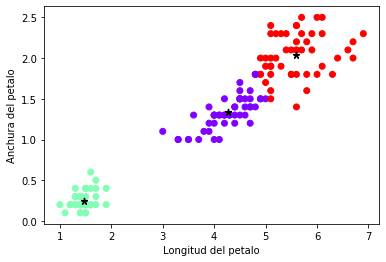

In [13]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans_3.labels_, cmap='rainbow')
plt.scatter(kmeans_3.cluster_centers_[:,0] ,kmeans_3.cluster_centers_[:,1], color='black',marker=(5,2))
plt.xlabel("Longitud del petalo"); plt.ylabel("Anchura del petalo"); plt.show()

*Figura 2-5. Gráfica resultante de aplicar el algoritmo de k-means para determinar 3 grupos*

Después de haber aplicado el algoritmo para encontrar tres grupos en vez de dos, se puede ver que el gran grupo que aparecía en la parte superior derecha se dividió en dos grupos que parecen ser del mismo tamaño. Se puede entonces continuar añadiendo grupos, pero no en todos los casos puede representar el paso correcto. 

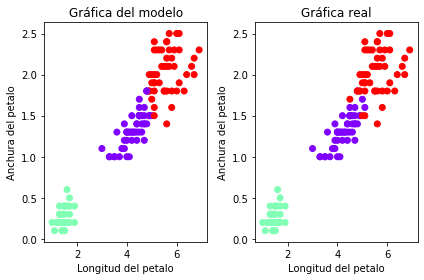

In [27]:
plt.subplot(1, 2, 1)
plt.scatter(X[:,0],X[:,1], c=kmeans_3.labels_, cmap='rainbow')
plt.title('Gráfica del modelo'); plt.xlabel("Longitud del petalo"); plt.ylabel("Anchura del petalo")

plt.subplot(1, 2, 2)
iris2=iris.copy()
variety = {'Setosa': 1,'Versicolor': 0,'Virginica':2} 
iris2.variety = [variety[item] for item in iris2.variety] 
plt.scatter(X[:,0],X[:,1], c=iris2.variety, cmap='rainbow')
plt.title('Gráfica real'); plt.xlabel("Longitud del petalo"); plt.ylabel("Anchura del petalo"); 
plt.tight_layout(); plt.show()

*Figura 2-6. Gráfica de comparación entre el modelo de cluster desarrollado y el agrupamiento real de los datos*

Se puede observar de la *Figura 2-6* como el algoritmo de clustering k-means aplicado en los datos hace un buen trabajo de agrupamiento, pues es casi igual a la gráfica de agrupamiento real. Hay otra manera de ver qué tan exacto es el modelo, y es la matriz de confusión:

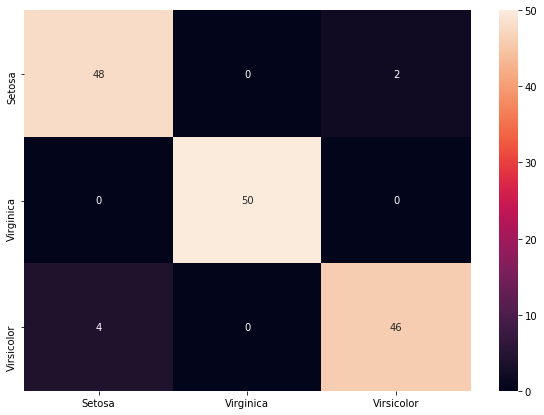

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_mat=confusion_matrix(iris2.variety,kmeans_3.labels_)
df_cm = pd.DataFrame(confusion_mat, index = [i for i in ['Setosa','Virginica','Virsicolor']],
                  columns = [i for i in ['Setosa','Virginica','Virsicolor']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True); plt.show()

En esta matriz de confusión las filas representan las clase verdaderas, mientras que las columnas indican las clases predichas por el modelo. En este caso, todas las que el modelo predijo como setosa, eran setosa. De las 48 virginicas que predijo, 46 eran virginicas y dos eran virsicolor, y de las 52 que predijo como virsicolor, 48 fueron correctas y 4 las predijo como virginicas. Como se puede observar, el modelo no es 100% exacto, pero es un modelo bastante bueno.

### Modelos mixtos:

Estos son los metodos que mezclan algoritmos tanto de regresión como de clasificación, utilizandolos en dos arquitecturas distintas: Primero un modelo de regresión cuya salida será la entrada de un modelo de clasificación, o viceversa.

### Modelos basados en arboles

Un arbol es una estructura que tiene nodos y aristas. Para un arbol de desición, en cada nodo se podría tener un valor con el cual se tomará una desición, con el objetivo de obtener información de los datos.

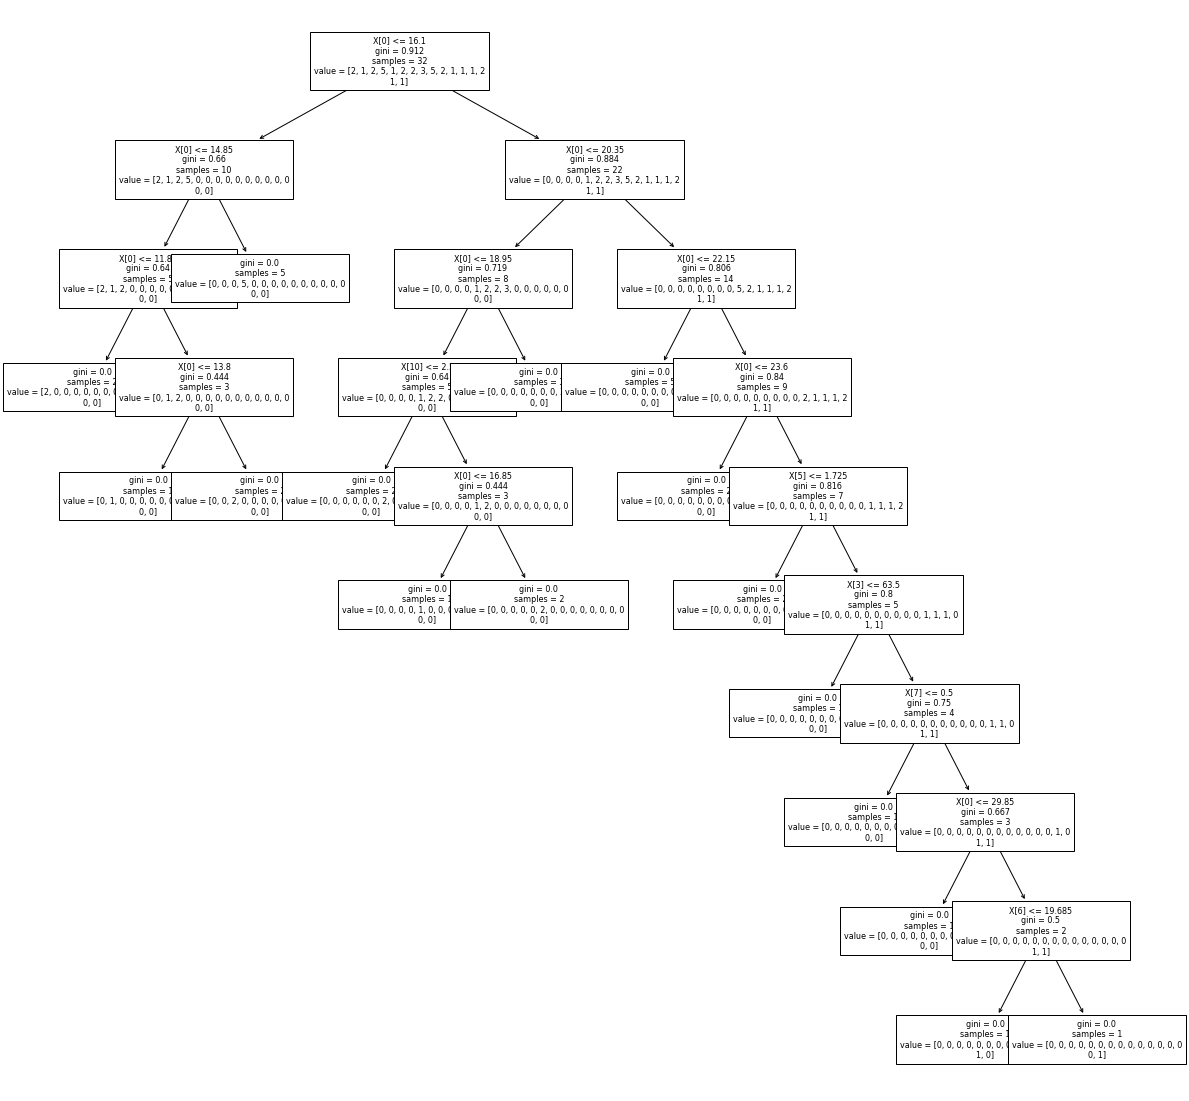

In [16]:
from sklearn import tree
Y_tree=data['mpg'].astype(int)
X_tree=np.array(data.loc[:, ~data.columns.isin(['b','Unnamed: 0'])])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tree, Y_tree)
plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=8)
plt.show()

En la anterior gráfica de arbol, se está mostrando la eficiencia de combustible contra todas las demás características del conjunto de datos. 

Para realizar predicciones sobre esta estructura de datos, primero se ha de preparar un modelo como ya se ha visto: Con unicamente datos de entrenamiento.

*Figura 2-7. Un Ejemplo de un arbol de decisión aplicado al conjunto de datos mtcars*

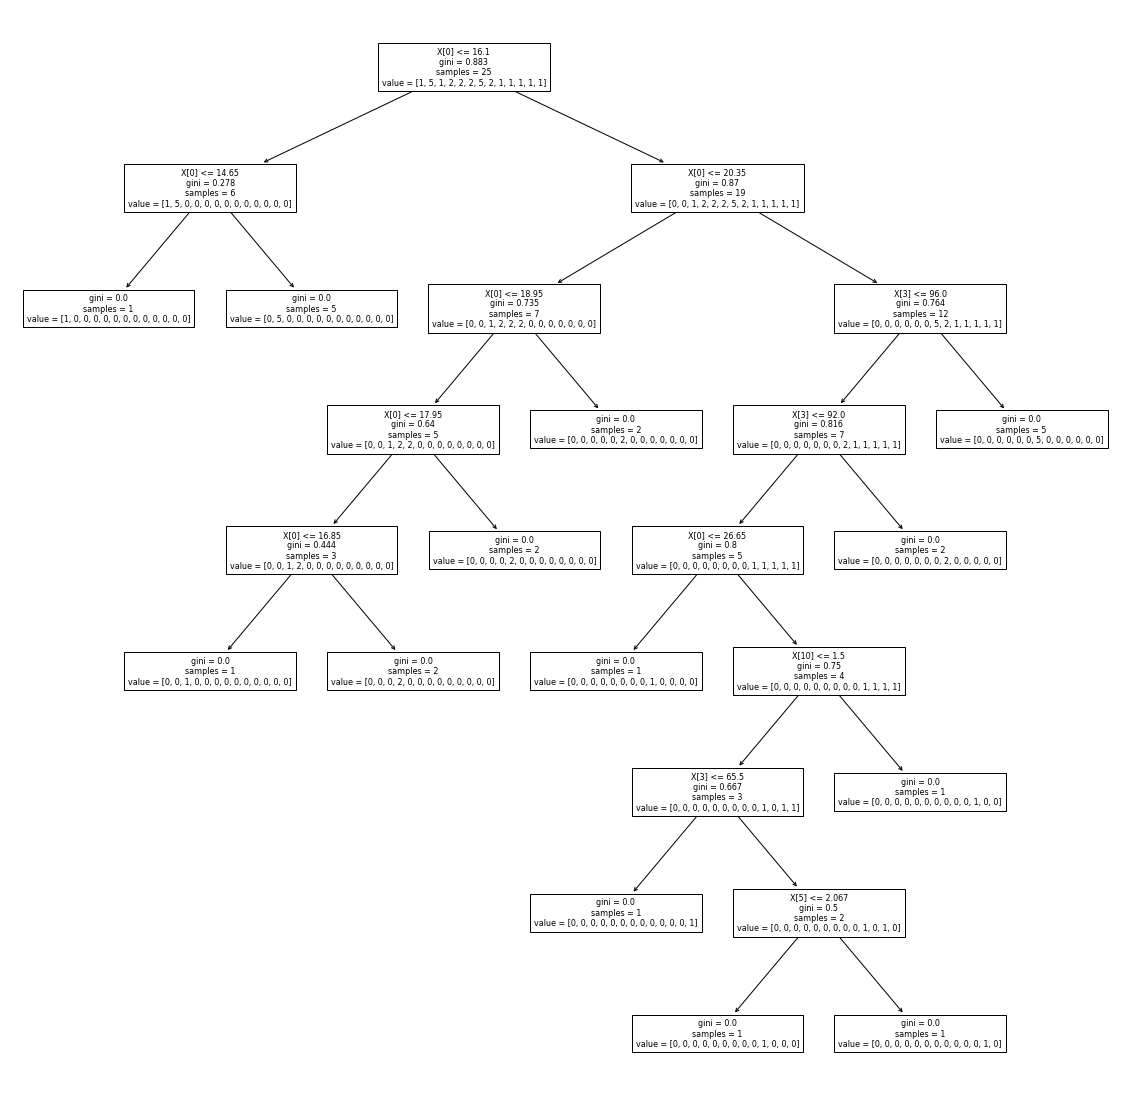

In [17]:
Y_tree1=train['mpg'].astype(int)
X_tree1=np.array(train.loc[:, ~train.columns.isin(['b','Unnamed: 0'])])
clf_train = tree.DecisionTreeClassifier()
clf_train = clf_train.fit(X_tree1, Y_tree1)
plt.figure(figsize=(20,20))
tree.plot_tree(clf_train, fontsize=8)
plt.show()

*Figura 2-8. Arbol de decisión resultante de el conjunto de datos de entrenamiento de el conjunto mtcars*

Se puede observar, que este arbol es ligeramente diferente al entrenado con todo el conjunto de datos. 

In [18]:
X_test = np.array(test.loc[:, ~test.columns.isin(['b','Unnamed: 0'])])
mpg_tree = clf_train.predict(X_test)
mpg_class = clf_train.predict_proba(X_test); tree_class=[list(i).index(1) for i in mpg_class]
pd.DataFrame({"test_mpg":test.mpg,"pred_mpg":mpg_tree, "test_class":tree_class})

,test_mpg,pred_mpg,test_class
7,24.4,26,8
9,19.2,19,5
14,10.4,14,0
15,10.4,14,0
16,14.7,15,1
23,13.3,14,0
27,30.4,21,6


De lo anterior se puede ver que de la clase resultante después del entrenamiento, se pudo invocar un metodo de regresión, para calcular la eficiencia de combustible, y otro de clasificación, para hallar una clase. En el dataframe se puede observar los resultados del modelo.

### Bosques aleatorios:

Los bosques aleatorios no son facilmente describtibles en un modelo simple, descrito por una ecuación lineal, o incluso un simple arbol que tiene unos cuantos nodos en el. 

En este metodo, comparado con los arboles de decisiones simples, necesariamente se irá variando ligeralmente el conjunto de datos, no cambiando los resultados en sí, pero variando las decisiones que han de llevar a esos resultados

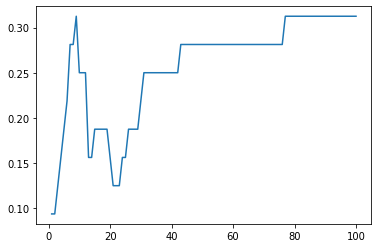

In [19]:
from sklearn.ensemble import RandomForestClassifier
from math import log10
import warnings
warnings.filterwarnings('ignore')
n_estimators = 100
forest = RandomForestClassifier(max_depth=2, random_state=0, oob_score=True)
n_trees=[]; error_trees=[]
for i in range(1, n_estimators + 1):
    forest.set_params(n_estimators=i)
    forest.fit(X_tree, Y_tree)
    n_trees.append(i); error_trees.append(forest.oob_score_)
plt.plot(n_trees,error_trees)

*Figura 2-9. Los algoritmos de bosques aleatorios son más dificiles para gráficar. Pero fácilmente se puede mostrar como el error evoluciona através de cuantos arboles se agregan al modelo*

En este caso, se observa que el error inicial es muy bajo, pero va cambiando conforme se van agregando más arboles. Note que hay un mínimo al rededor de los 20 arboles.

### Redes neuronales

Las redes neuronales, como su nombre puede llegar a sugerir, basan su funcionamiento en la manera en la cual las neuronas trabajan en un sistema biologíco. Dado un dato de entrada, una red neuronal realiza un numero de pasos antes de dar una respuesta o salida. La complejidad de la red neuronal se basa en como son de complejos estos pasos, y que tan complejo puede llegar a ser cada paso.

Un ejemplo de como puede funcionar una red neuronal es a través de el uso de las puertas logicas. En la programación se usa regularmente la logica.

In [20]:
print(True and True)
print(True and False)
print(False and False)

True
False
False


Se puede definir una red neuronal simple como una que reciba dos parámetros de entrada, calcule la función *AND* y devuelva el resultado. Estas pueden ser representadas graficamente usando nodos y capas. Las capas son secciones verticales de lo visual, y los nodos son los puntos de calculo dentro de cada capa. Matemáticamente esto requiere el uso de una *Variable de parcialidad* o *bias*, que es una constante que se añade a la equación para propositos de calculo, y es representada como su propio nodo, tipicamente arriba de cada capa en la red neuronal-

En el caso de la función *AND*, se usarán valores numericos, evaluados en una función de clasificación, que brinde un resultado binario, que representaría el 1 para *True* o verdadero y 0 para *False* o falso. Se puede hacer eso utilizando la función sigmoidal:

$$f(x) = \frac{1}{1+e^{-x}}$$

Para valores negativos de $x$ que son menores que -5, la función es básicamente 0. Para valores positivos mayores que 5, la función es básicamente 1. Si se tiene un conjunto predefinido de pesos para cada nodo en la red neuronal, se puede tener una imagen similar a la *Figura 2-10*.

<img src="https://www.allaboutcircuits.com/uploads/thumbnails/how-to-train-a-basic-perceptron-neural-network_rk_aac_image1.jpg"/>

*Figura 2-10. Un ejemplo de una red neuronal representada en un diagrama que se lee de izquierda a derecha*

Para calcular el resultado final de la función *AND*, se deberá dar dos datos de entrada, en *y* y *z*. El nodo de *x* se tiene reservado para la variable bias. Cuando la red neuronal esté entrenada, se encontraran pesos o *weights* que estarán sujeros a cada entrada. Teniendo esto, se pasarán estos datos através de la función sigmoidal, y obtener el resultado al otro lado. 

Así pues, los conceptos que se tienen hasta ahora:

* La capa de entrada (Input layer): Esta capa es la encargada de recibir un número de caracteristicas, incluyendo el bias.
* La capa oculta (Hidden layer): Esta es la capa que se encarga del procesamiento de una función de cada característica.
* La capa de resultado (Output layer): Esta es la capa final, donde se realiza el último procesamiento para dar el resultado.

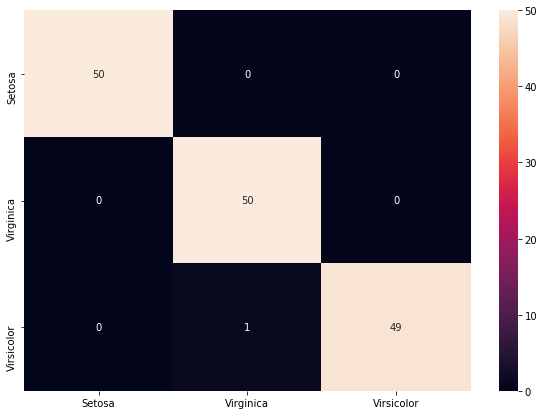

In [21]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(2), random_state=1)
clf.fit(np.array(iris.loc[:, ~iris.columns.isin(['variety'])]),np.array(iris2.variety).reshape(-1, 1))
nn_predict=clf.predict(iris.loc[:, ~iris.columns.isin(['variety'])])

confusion_mat_nn=confusion_matrix(iris2.variety,nn_predict)
df_nn = pd.DataFrame(confusion_mat_nn, index = [i for i in ['Setosa','Virginica','Virsicolor']],
                  columns = [i for i in ['Setosa','Virginica','Virsicolor']])
plt.figure(figsize = (10,7))
sn.heatmap(df_nn, annot=True); plt.show()

En este caso, uno de los parámetros de entrada de la clase *MLPClassifier* se refiere al número de capas ocultas, en este caso, 2. Note también que después de realizar el entrenamiento, se pueden observar los resultados en una matriz de confusión. Se observa que tuvo muy buenos resultados.

### Maquinas de vectores de soporte:

Las máquinas de vectores de soporte o *SVM* son otro tipo de algoritmo que permite realizar tareas tanto de clasificación como de regresión. Normalmente, es introducido de manera más simple que una red neuronal. Las SVM trabajan de manera similar en muchas maneras a la regresión logística. 

Suponga que tiene *n* características en un conjunto de datos y *m* obvservaciones, o filas. Si *n* es mucho más grande que *m*, se debería usar un regresor logístico. Si es el caso contrario, se debería usar el método de SVM.

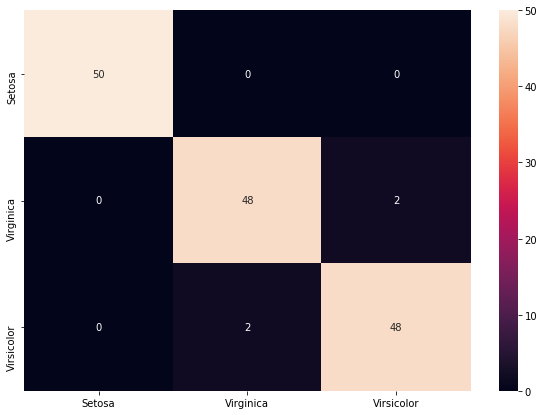

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(np.array(iris.loc[:, ~iris.columns.isin(['variety'])]),np.array(iris2.variety).reshape(-1, 1))
svm_predict=clf.predict(iris.loc[:, ~iris.columns.isin(['variety'])])
confusion_mat_svm=confusion_matrix(iris2.variety,svm_predict)
df_svm = pd.DataFrame(confusion_mat_svm, index = [i for i in ['Setosa','Virginica','Virsicolor']],
                  columns = [i for i in ['Setosa','Virginica','Virsicolor']])
plt.figure(figsize = (10,7))
sn.heatmap(df_svm, annot=True); plt.show()

Los resultados en este caso para el algoritmo de clasificación de SVM son bastante similares al visto en redes neuronales. Frecuentemente, estos dos algoritmos compiten por el puesto del más popular o usado, cada uno tiene sus ventajas y desventajas, y es mejor siempre analizar estas características con el problema que se tenga, para determinar cual sería mejor.

### Entrenamiento no supervisado

Los algoritmos utilizados en el entrenamiento no supervisado, toman un enfoque diferente a los antes vistos. Estos tratan de definir la estructura general de los datos. En principio, estos no necesitan un conjunto de datos de evaluación para evaluar su rendimiento.

Generalmente, la mayoría de algoritmos de Machine learning serán usados bajo el entrenamiento supervisado. Sin embargo, en este tipo de paradigma, la evaluación y puntuación del modelo se hace ligeramente diferente, un ejemplo podría ser la minería de texto. Un modelo de aprendizaje no supervisado basado en todos los escritos de Abraham Lincoln, se usaría para construir una inteligencia artificial que fuese capaz de escribir con este autor, basado en características como la frecuencia y proximidad entre las palabras.

El algoritmo más común de este tipo de entrenamiento es el clustering. Ya se vió un metodo de clustering usando un enfoque de entrenamiento supervisado, sin embargo es más común que este algoritmo no tenga la información de respuesta correcta para comparar el modelo.

### Metodos de clustering no supervisados

En la versión no supervisada del clustering, se parte de un conjunto de datos que no tienen una clasificación categorica explicita y se aplica el algoritmo para ver su estructura

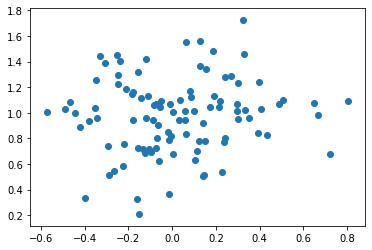

In [23]:
x_clust = np.column_stack([list(np.random.normal(0, 0.3, 100)), list(np.random.normal(1, 0.3, 100))])
plt.scatter(x_clust[:,0],x_clust[:,1]); plt.show()

*Figura 2-11 Una distribución aleatoria de datos que se quieren clasificar en dos distintos clusters.*

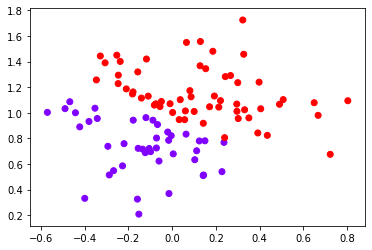

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_clust)
plt.scatter(x_clust[:,0],x_clust[:,1], c=kmeans.labels_, cmap='rainbow'); plt.show()

*Figura 2-12. Algoritmo de kmeans aplicado a datos aleatoriamente distribuidos*